In [12]:
df=tibble::tibble(
  Treatment = rep(c("Treatment 1", "Treatment 2"), each = 7L),
  Position = rep(rep(c("Top", "Bottom", "Central"), 2), rep(c(2L, 2L, 3L), 2)),
  Grain = rep(c("G1", "G3", "G1", "G3", "G1", "G3", "G4"), 2),
  Observation = c(27.52, 37.25, 49.74, 43.98, 55.35, 49.01, 43.37, 15, 25.26, 34.74, 28.98, 40.35, 34.01, 28.37),
  Observation_se = rep(c(3.78, 4.28, 1.86, 1.67, 4.26, 4.13, 3.31), 2),
  Prediction = c(47, 58.25, 74.74, 68.98, 92.25, 74.01, 68.37, 9.25, 22.96, 33.16, 27.5485, 38.45, 32.95, 24.55),
  Prediction_se = c(3.32, 2.53, 1.55, 1.82, 3.33, 3.37, 3.29, 3.59, 3.17, 1.35, 1.79, 3.76, 3.14, 3.31))

print(head(df, 3))

# A tibble: 3 × 7
  Treatment   Position Grain Observation Observation_se Prediction Prediction_se
  <chr>       <chr>    <chr>       <dbl>          <dbl>      <dbl>         <dbl>
1 Treatment 1 Top      G1           27.5           3.78       47            3.32
2 Treatment 1 Top      G3           37.2           4.28       58.2          2.53
3 Treatment 1 Bottom   G1           49.7           1.86       74.7          1.55


In [11]:
if(!require(ggforce)) install.packages("ggforce")
library(ggforce)

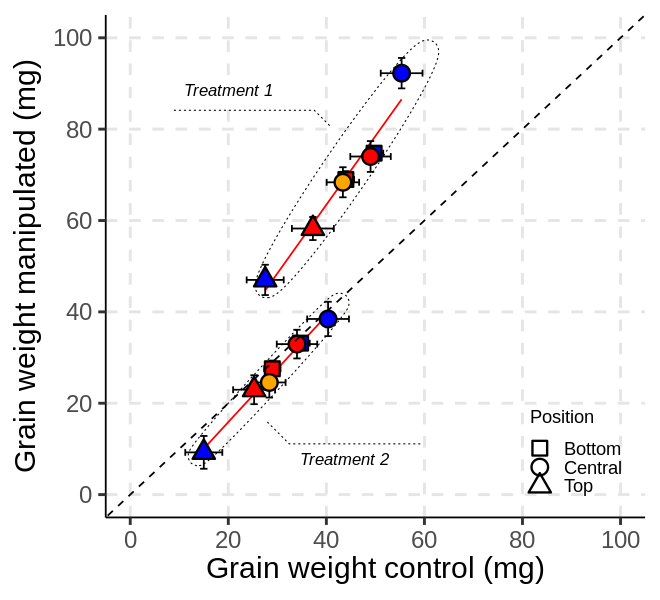

In [13]:
Fig= ggplot (df, aes (x=Observation, y=Prediction)) +

  geom_smooth(aes(group=Treatment), method=lm, level=0.95,
              se=FALSE, linetype=1, linewidth=0.5, color="red", formula=y~x) +

  geom_mark_ellipse(aes(label=Treatment, group=Treatment),
                    expand=unit(2, "mm"), # shrink the ellipse slightly
                    label.buffer= unit(7, "mm"), # move label closer (default ~5 mm)
                    color="black", # ellipse color
                    linetype="dotted", linewidth=0.3, # ellipse line
                    con.colour="black", con.linetype="dotted", con.size=0.3, # label connecting line
                    label.col="black", label.fontsize=10, label.fontface = "italic") +  # label font

  geom_errorbar(aes(xmin=Observation - Observation_se, xmax=Observation + Observation_se),
                width=1.5, linewidth=0.5, color="black") +

  geom_errorbar(aes(ymin= Prediction - Prediction_se, ymax = Prediction + Prediction_se),
                width=1.5, linewidth=0.5, color="black") +

  geom_point(aes(fill=Grain, shape=Position), stroke=1, size=4) +
  geom_abline (slope=1, linetype="dashed", color="black", linewidth=0.5) +
  scale_fill_manual(values=c("blue","red","orange")) +
  scale_shape_manual(values=c(22,21,24)) +
  scale_x_continuous(breaks = seq(0,100,20), limits = c(0,100)) +
  scale_y_continuous(breaks = seq(0,100,20), limits = c(0,100)) +
  guides(fill="none") +
  labs(x="Grain weight control (mg)", y="Grain weight manipulated (mg)") +
  theme_classic(base_size=18, base_family="sans")+
  theme(legend.position=c(0.89,0.13),
        legend.title=element_text(size=11),
        legend.key.size=unit(0.2,'cm'),
        legend.key=element_rect(color=alpha("white",.05),
                                fill=alpha("white",.05)),
        legend.text=element_text(size=11),
        legend.background= element_rect(fill=alpha("white",.05)),
        panel.grid.major= element_line(color="grey90", linetype="dashed"),
        axis.line=element_line(linewidth=0.5, colour="black"))

options(repr.plot.width=5.5, repr.plot.height=5)
print(Fig)

ggsave("Fig.png", plot=Fig, width=5.5, height=5, dpi=300)